In [124]:
#Import Required Python Libraries 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [125]:
#Load the dataset
data=np.loadtxt("/Users/prayashdas/Desktop/HW2 - 23Fall-2/data2.txt", delimiter=',')

In [126]:
#Extract features(x) and target(y)
x=data[:,0]
y=data[:,1]

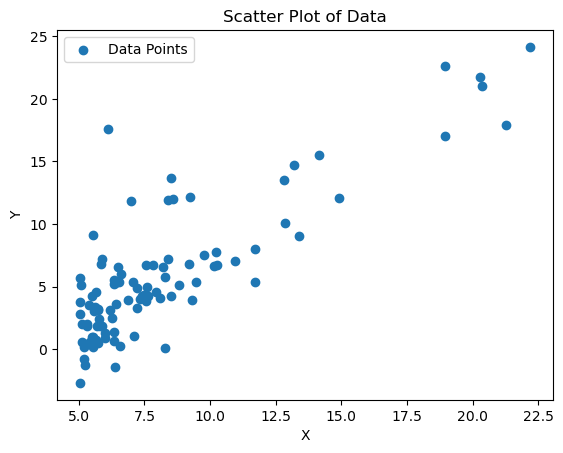

In [127]:
#Plotting the data
plt.scatter(x,y,label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Scatter Plot of Data')
plt.show()

In [128]:
#Splitting the datasets into training 80% and testing 20%
x_train,x_test, y_train, y_test=train_test_split(x,y,train_size=0.8)

In [129]:
#Method 1: Normal Equation
X_train=np.vstack((np.ones_like(x_train),x_train)).T
theta_normal=np.matmul(np.linalg.inv(np.matmul(X_train.T,X_train)),np.matmul(X_train.T,y_train))
theta_normal

array([-3.97203985,  1.20071427])

In [130]:
#Method 2: Batch Gradient Descent 
def batch_gradient_descent(X,y,theta,learning_rate, num_iterations):
    m=len(y)
    mse_history=[]
    for i in range(num_iterations):
        predictions = X.dot(theta)
        gradient = (1/m) * X.T.dot(predictions - y)
        theta=theta-learning_rate * gradient
        mse = mean_squared_error(y, predictions)
        mse_history.append(mse)
    return theta, mse_history
learning_rate_batch=0.001
num_iterations=10000
initial_weights=np.zeros(2)
theta_batch,mse_history_batch=batch_gradient_descent(X_train,y_train,initial_weights,learning_rate_batch,num_iterations)

        
        
    


Text(0.5, 1.0, 'Batch Gradient Descent - Training MSE')

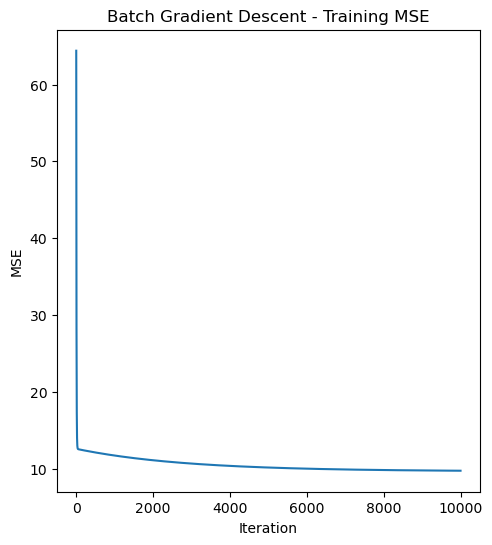

In [131]:
#Plot MSE v Iteration for Batch Gradient
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(num_iterations), mse_history_batch, label='Batch - Training')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Batch Gradient Descent - Training MSE')


In [132]:
#Method 3: Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    mse_history = []
    for i in range(num_iterations):
        for j in range(m):
            random_index = np.random.randint(0, m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            prediction = xi.dot(theta)
            gradient = xi.T.dot(prediction - yi)
            theta=theta-learning_rate * gradient
        mse = mean_squared_error(y, X.dot(theta))
        mse_history.append(mse)
    return theta, mse_history

learning_rate_stochastic = 0.001
theta_stochastic, mse_history_stochastic = stochastic_gradient_descent(X_train, y_train, initial_weights, learning_rate_stochastic, num_iterations)


        

Text(0.5, 1.0, 'Stochastic Gradient Descent - Training MSE')

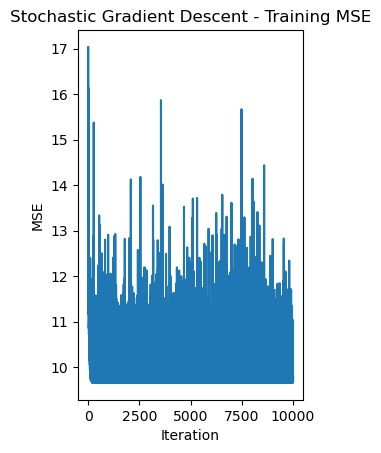

In [133]:
#Plot MSE v Iteration for Stochastic Gradient
plt.subplot(1, 2, 2)
plt.plot(range(num_iterations), mse_history_stochastic, label='Stochastic - Training')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Stochastic Gradient Descent - Training MSE')

In [134]:
#Evaluating the testing dataset 
X_test = np.vstack((np.ones_like(x_test), x_test)).T
y_pred_batch=X_test.dot(w_batch)
y_pred_stochastic = X_test.dot(w_stochastic)

mse_batch_test = mean_squared_error(y_test, y_pred_batch)
mse_stochastic_test = mean_squared_error(y_test, y_pred_stochastic)

print("MSE on Testing Set (Batch Gradient Descent):", mse_batch_test)
print("MSE on Testing Set (Stochastic Gradient Descent):", mse_stochastic_test)

MSE on Testing Set (Batch Gradient Descent): 6.2680747141190265
MSE on Testing Set (Stochastic Gradient Descent): 6.4935174846439905


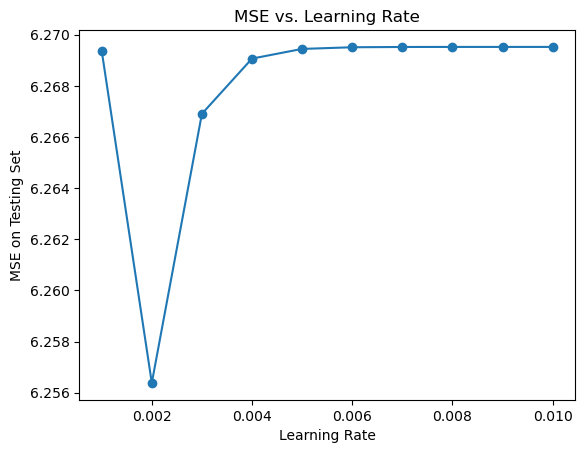

Best learning rate: 0.002


In [135]:
#Plot MSE v Learning Rate
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
mse_lr = []

for lr in learning_rates:
    w_lr, _ = batch_gradient_descent(X_train, y_train, initial_weights, lr, num_iterations)
    y_pred_lr = X_test.dot(w_lr)
    mse_lr.append(mean_squared_error(y_test, y_pred_lr))

plt.plot(learning_rates, mse_lr, marker='o', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('MSE on Testing Set')
plt.title('MSE vs. Learning Rate')
plt.show()

best_learning_rate = learning_rates[np.argmin(mse_lr)]
print("Best learning rate:", best_learning_rate)
